In [70]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv('../Datasets/library.csv')

In [72]:
df.head(5)

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
0,206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
1,216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
3,472,NaN,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
4,480,"A new edition, revised, etc.",London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.


In [73]:
for i in range(len(df)):
    string = df.iloc[i]['Place of Publication']
    a = string.find(',')
    b = string.find(';')
    if  a >= 0:
        string = string[0:a]
    if  b >= 0:
        string = string[0:b]
    df.at[i, 'Place of Publication'] = string

In [74]:
to_drop = ['Edition Statement','Corporate Author','Corporate Contributors',
           'Former owner','Engraver','Contributors','Issuance type','Shelfmarks']

In [75]:
df.drop(columns = to_drop, inplace = True)

In [76]:
df['Date of Publication'] = df['Date of Publication'].str.extract(r'(\d{4})', expand=False)

In [77]:
df.dropna(inplace = True)

In [78]:
df['Date of Publication'] = pd.to_numeric(df['Date of Publication'])

In [79]:
df.set_index('Identifier', inplace=True)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3061 entries, 206 to 4159587
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Place of Publication  3061 non-null   object
 1   Date of Publication   3061 non-null   int64 
 2   Publisher             3061 non-null   object
 3   Title                 3061 non-null   object
 4   Author                3061 non-null   object
 5   Flickr URL            3061 non-null   object
dtypes: int64(1), object(5)
memory usage: 167.4+ KB


In [81]:
df

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
Identifier,,,,,,
206,London,1879,S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
216,London,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
...,...,...,...,...,...,...
4157746,London,1811,F. C. and J. Rivington,"The New Chronicles of England and France, in t...","FABYAN, Robert.",http://www.flickr.com/photos/britishlibrary/ta...
4157862,Newcastle-upon-Tyne,1867,T. Fordyce,"Local Records; or, Historical Register of rema...","FORDYCE, T. - Printer, of Newcastle-upon-Tyne",http://www.flickr.com/photos/britishlibrary/ta...
4158128,Derby,1831,M. Mozley & Son,The History and Gazetteer of the County of Der...,"GLOVER, Stephen - of Derby",http://www.flickr.com/photos/britishlibrary/ta...


In [82]:
dates = list(df['Date of Publication'])

In [83]:
new_dates = set(dates)

In [84]:
counts = []
for ndate in new_dates:
    counts.append(dates.count(ndate))

In [85]:
df2 = pd.DataFrame(data=zip(new_dates,counts))

In [86]:
df2.sort_values(0, axis=0, ascending=True, inplace=True)

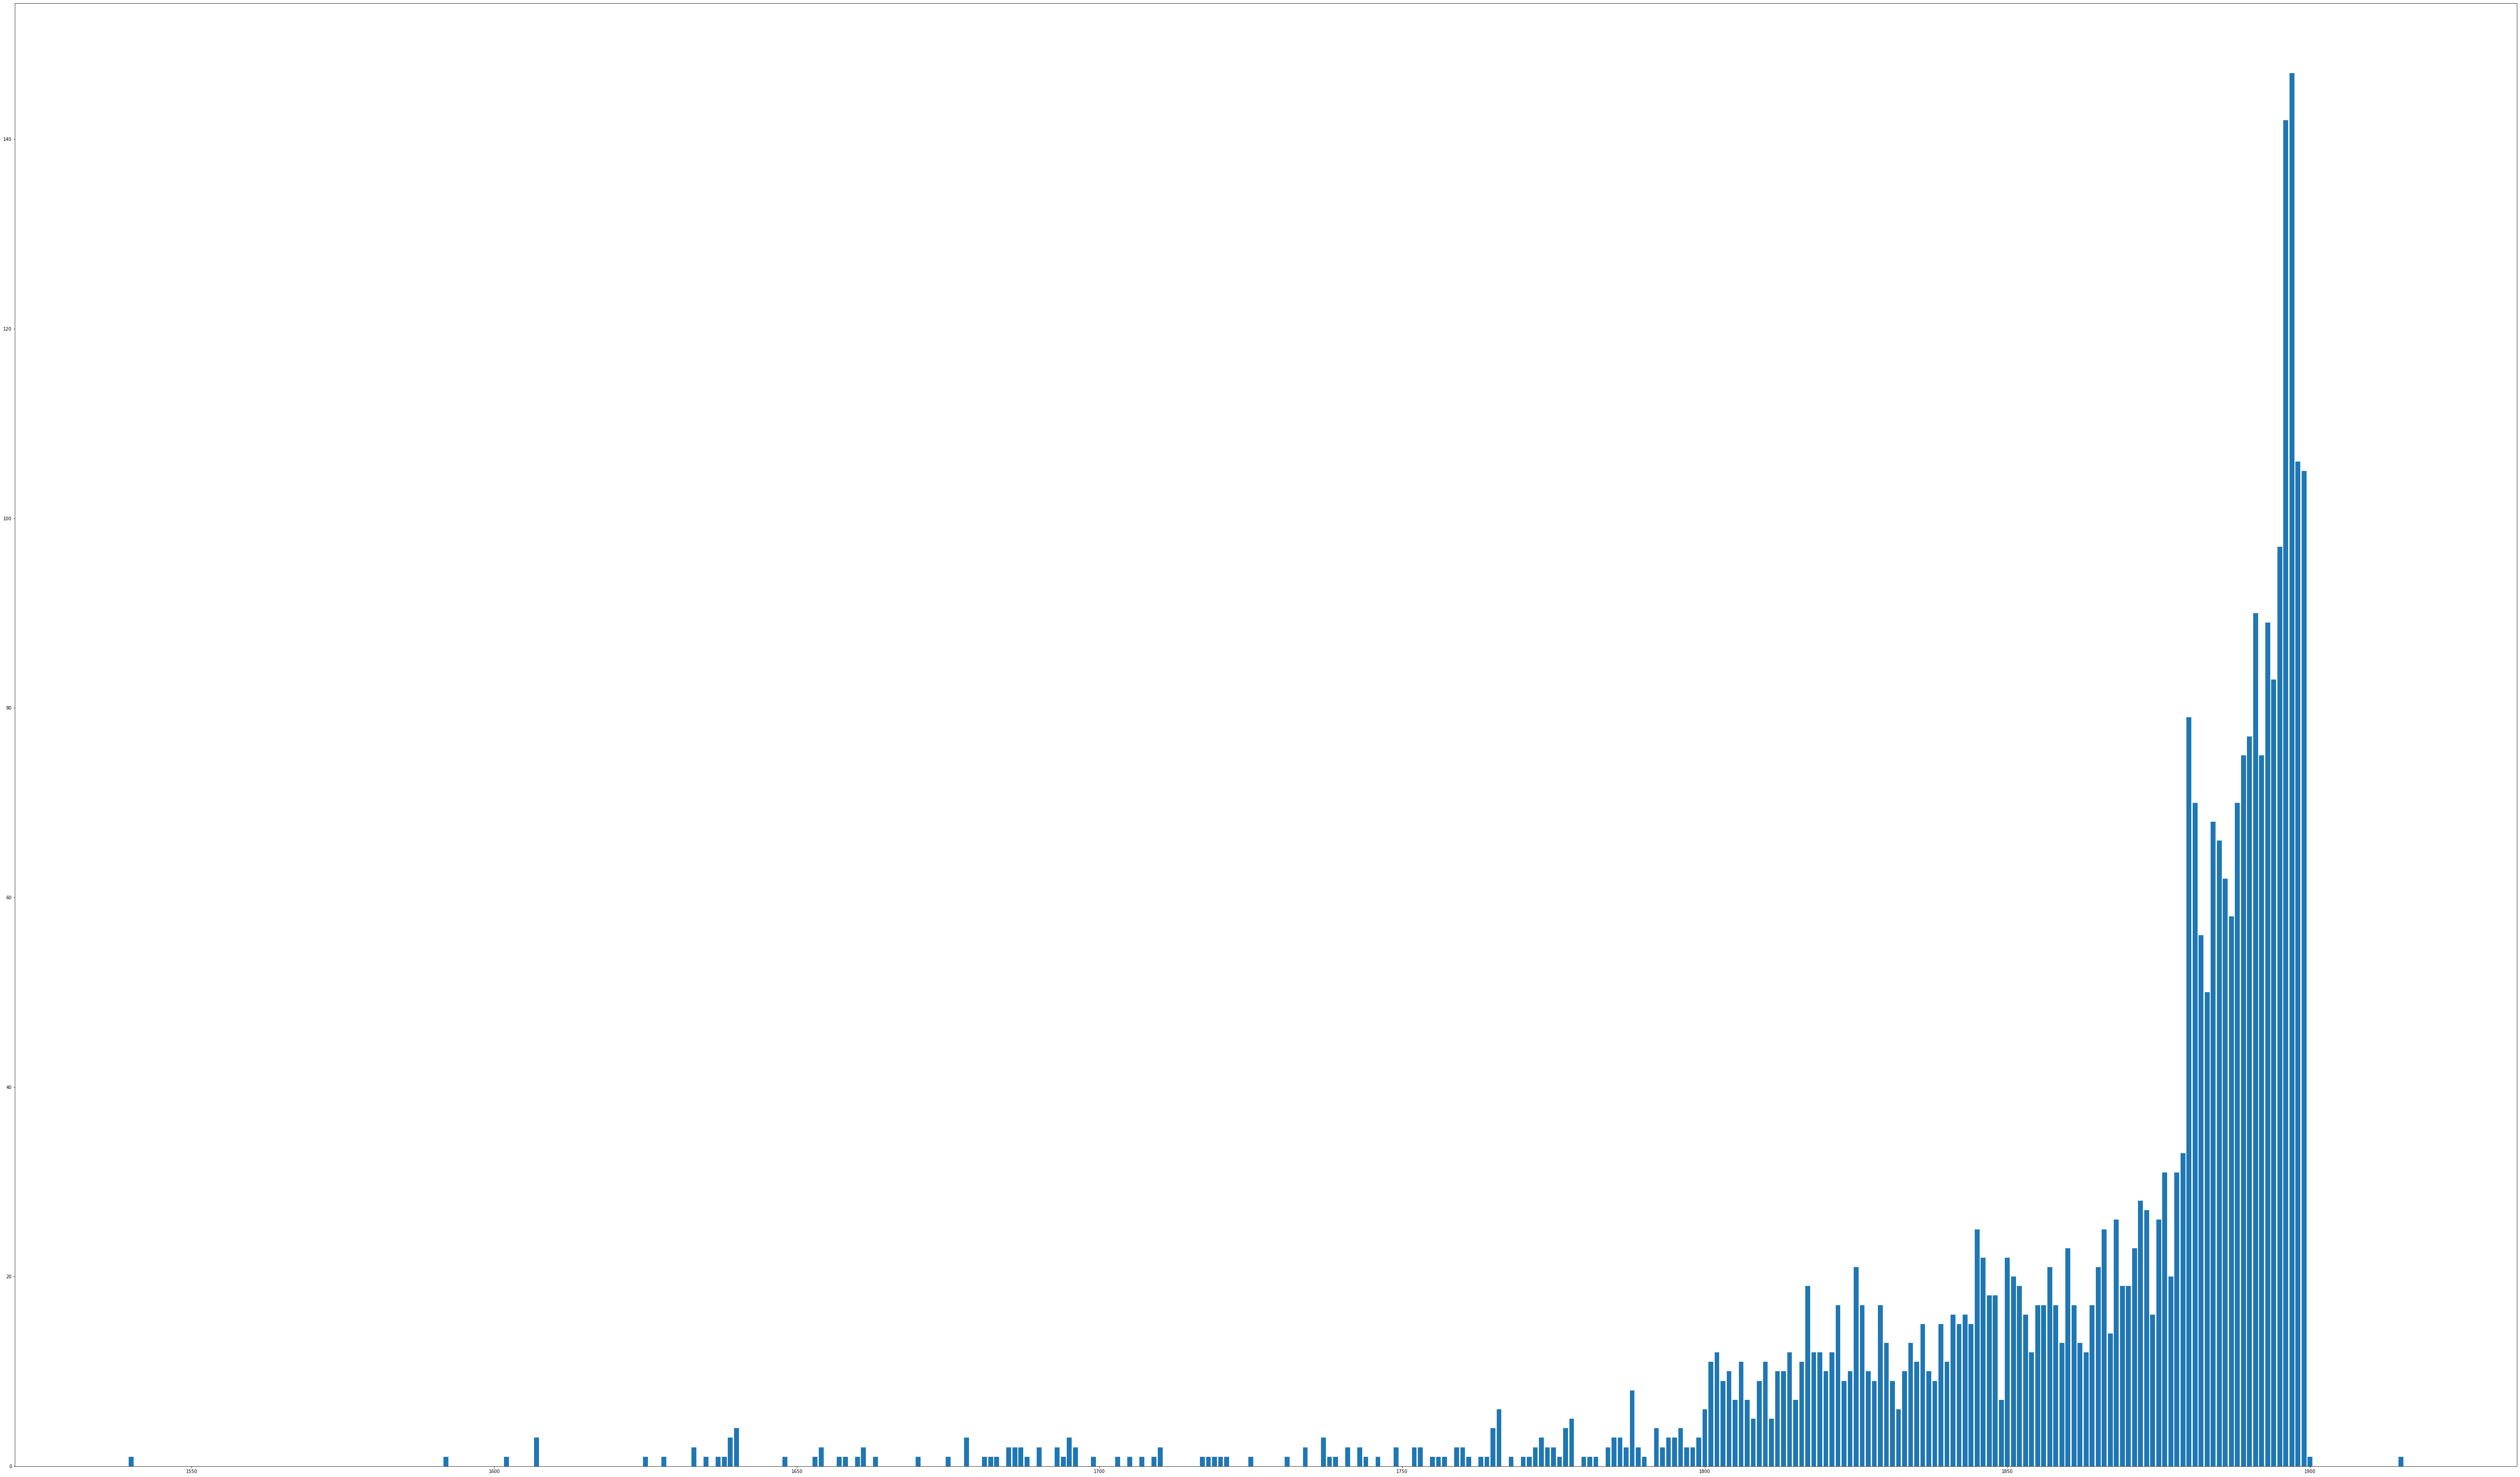

In [87]:
# Define plot space
fig, ax = plt.subplots(figsize=(100, 60))

# Create bar plot
ax.bar(df2[0], df2[1])

plt.show()
